In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import joblib


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, roc_auc_score, roc_curve
)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score,confusion_matrix, classification_report, roc_curve, auc,f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.exceptions import FitFailedWarning
from xgboost import XGBClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, classification_report, roc_curve, auc
)
import matplotlib.pyplot as plt


In [2]:
import import_ipynb
from adda_boost import CustomAdaBoost
from random_forest2 import RFModel
from svm import CSVM
from XG_boost import XGBboost

import pickle

In [ ]:
session_cattagory = {}
def get_test_train_data_from_csv(hum_file = "../parsed_data/human.csv",bot_file = "../parsed_data/bots.csv"):

    df_bots = pd.read_csv(bot_file)
    df_bots["bot"] = 1
    df_bots
    for ses in df_bots.iloc[:,0].values:
        session_cattagory[ses] = 1

    df_hum = pd.read_csv(hum_file)
    df_hum["bot"] = 0
    df_hum
    for ses in df_hum.iloc[:,0].values:
        session_cattagory[ses] = 0
    df_merged = pd.concat([df_bots, df_hum], ignore_index=True, sort=False)
    df_merged

    X = df_merged.iloc[:, 1:-1].values
    Y = df_merged.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

In [4]:
X_train, X_test, y_train, y_test = get_test_train_data_from_csv("../parsed_data/human.csv","../parsed_data/bots.csv")

Estimator 1/250, err=0.316436, alpha=0.096275, train_acc=0.6836
Estimator 2/250, err=0.332390, alpha=0.087174, train_acc=0.6836
Estimator 3/250, err=0.340357, alpha=0.082713, train_acc=0.7020
Estimator 4/250, err=0.361322, alpha=0.071204, train_acc=0.7020
Estimator 5/250, err=0.349808, alpha=0.077485, train_acc=0.7266
Estimator 6/250, err=0.374865, alpha=0.063925, train_acc=0.6989
Estimator 7/250, err=0.370958, alpha=0.066013, train_acc=0.7281
Estimator 8/250, err=0.380120, alpha=0.061130, train_acc=0.7281
Estimator 9/250, err=0.386469, alpha=0.057773, train_acc=0.7296
Estimator 10/250, err=0.391051, alpha=0.055362, train_acc=0.7281
Estimator 11/250, err=0.398374, alpha=0.051531, train_acc=0.7281
Estimator 12/250, err=0.397766, alpha=0.051848, train_acc=0.7296
Estimator 13/250, err=0.404175, alpha=0.048512, train_acc=0.7296
Estimator 14/250, err=0.413778, alpha=0.043546, train_acc=0.7281
Estimator 15/250, err=0.407237, alpha=0.046925, train_acc=0.7296
Estimator 16/250, err=0.414719, al

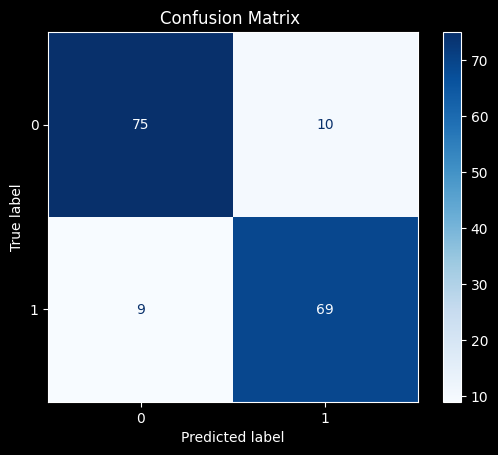

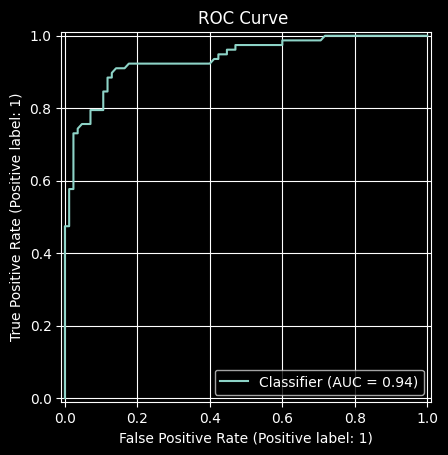

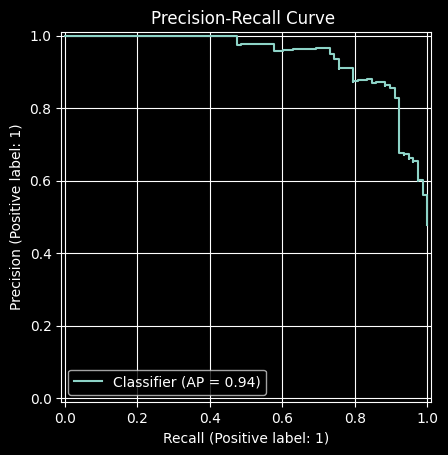

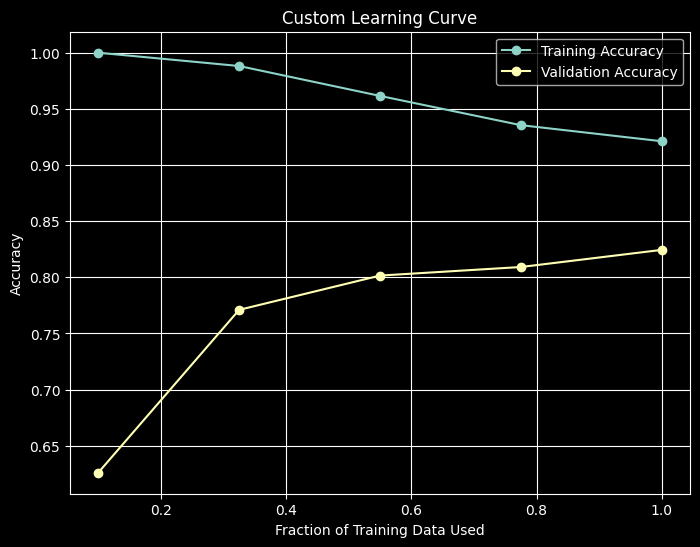

In [5]:
n_estimator = 250
learning_Rate = 0.25

# print(n_estimator,learning_Rate)
model=CustomAdaBoost(n_estimators=n_estimator,learning_rate=learning_Rate,random_state=42)

# optional: pass a validation split to get validation learning curve points
model.fit(X_train, y_train, X_val=X_test, y_val=y_test, verbose=True)

# predictions
y_pred_adda_boost = model.predict(X_test)

probas = model.predict_proba(X_test)[:, 1]  # probability of positive

# evaluation printed
model.evaluate(y_test, y_pred_adda_boost)

# plots (printed inline)
model.plot_confusion_matrix(y_test, y_pred_adda_boost)
y_scores = model.decision_function(X_test)
model.plot_roc_pr(y_test, X_scores=y_scores)
# model.plot_feature_importance(feature_names=list_of_feature_names)
model.plot_learning_curve_custom(X_train, y_train)

In [6]:
with open("Addaboost.pkl",'wb') as file:
    pickle.dump(model,file)

Accuracy : 85.89%
Precision: 82.35%
Recall   : 89.74%
F1-Score : 85.89%


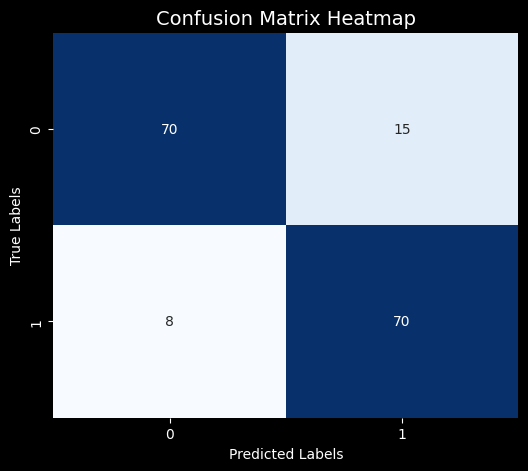

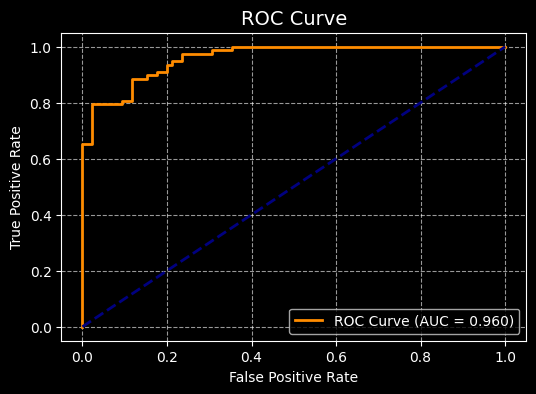

ROC AUC Score: 0.960


In [7]:
rf_classifier = RFModel()
rf_classifier.fit(X_train, y_train)
y_pred_rand_forest = rf_classifier.predict(X_test)
rf_classifier.print_stats(y_test, y_pred_rand_forest)
rf_classifier.plot_confusion_matrix(y_test, y_pred_rand_forest)
rf_classifier.plot_roc_curve(X_test, y_test)

In [8]:
with open("RandomForest.pkl",'wb') as file:
    pickle.dump(rf_classifier,file)


Dataset — Accuracy: 0.8037
              precision    recall  f1-score   support

           0     0.8732    0.7294    0.7949        85
           1     0.7500    0.8846    0.8118        78

    accuracy                         0.8037       163
   macro avg     0.8116    0.8070    0.8033       163
weighted avg     0.8143    0.8037    0.8030       163



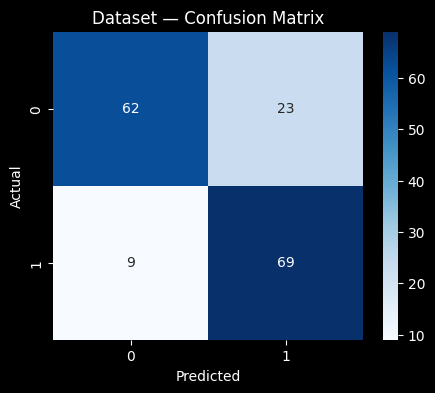

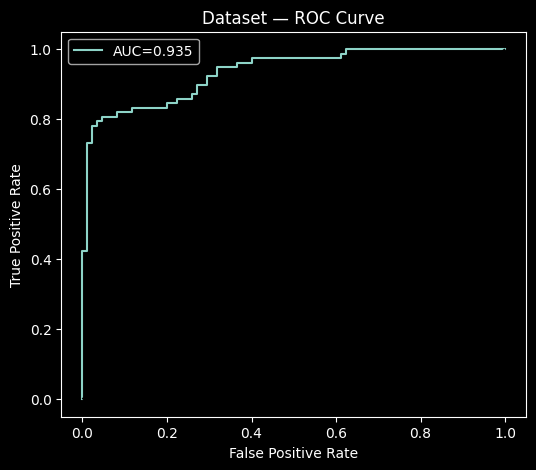

Dataset — ROC AUC: 0.9345


In [10]:


# Train SVM (tuned params)
svm = CSVM()
svm.fit(X_train, y_train)

# Predict + metrics
y_pred_svm = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, y_pred_svm)
print(f"\nDataset — Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred_svm, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Dataset — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC={auc:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Dataset — ROC Curve")
plt.legend()
plt.show()

print(f"Dataset — ROC AUC: {auc:.4f}")

In [11]:
with open("SVM.pkl",'wb') as file:
    pickle.dump(svm,file)

c:\Users\sudin\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [20:02:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "max_leaf_nodes", "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== Model Performance ===
Accuracy:  0.8896
F1 Score:  0.8902
Precision: 0.8488
Recall:    0.9359


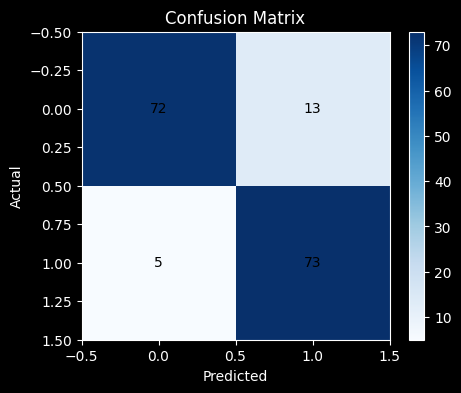

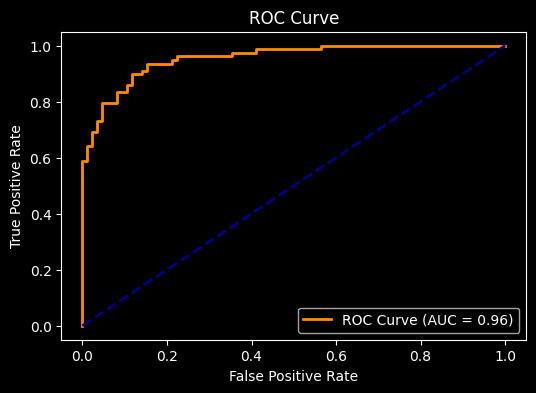

In [12]:
XGB_classifier=XGBboost()
XGB_classifier.fit(X_train,y_train)

y_pred_XGB=XGB_classifier.predict(X_test)
XGB_classifier.print_stats(y_test,y_pred_XGB)

XGB_classifier.plot_confusion_matrix(y_test,y_pred_XGB)
XGB_classifier.plot_roc_curve(X_test,y_test)


# XGB_classifier_nomv=XGBboost()
# XGB_classifier_nomv.fit(X_train_nomv,y_train_nomv)

# y_pred_nomv=XGB_classifier_nomv.predict(X_test_nomv)
# XGB_classifier_nomv.print_stats(y_test_nomv,y_pred_nomv)

# XGB_classifier_nomv.plot_confusion_matrix(y_test_nomv,y_pred_nomv)
# XGB_classifier_nomv.plot_roc_curve(X_test_nomv,y_test_nomv)

In [13]:
with open("XGBoost.pkl",'wb') as file:
    pickle.dump(XGB_classifier,file)

In [9]:
all_y_pred = [y_pred_adda_boost,y_pred_rand_forest,y_pred_XGB,y_pred_svm]
len_y = len(y_pred_XGB)

In [10]:
y_pred_voting = []

In [11]:
num_voters = len(all_y_pred)
tot_votes = [0 for i in range(len_y)]

for y_pred in all_y_pred:
    for i in range(len_y):
        tot_votes[i] += y_pred[i]


In [12]:
y_pred_bagging = [1 if tot_votes[i]>=2 else 0 for i in range(len_y)]

=== Model Performance ===
Accuracy:  0.8773
F1 Score:  0.8810
Precision: 0.8222
Recall:    0.9487


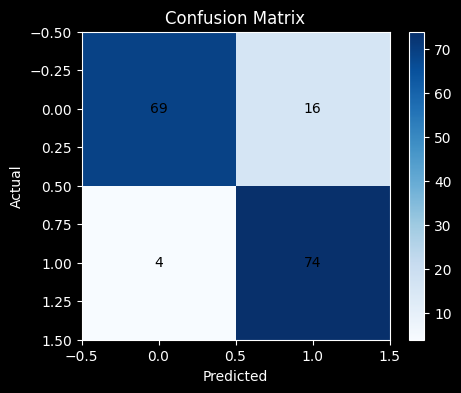

In [13]:
XGB_classifier.print_stats(y_test,y_pred_bagging)
XGB_classifier.plot_confusion_matrix(y_test,y_pred_bagging)